In [79]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

In [80]:
import json
import statistics

In [81]:
#create an empty list to populate with artist names

random_nums = np.random.randint(low=100000, high=170000, size=500)

artist_names=[]

In [82]:
#create a base url
#example: https://theaudiodb.com/api/v1/json/1/artist.php?i=112024
id_url = "https://theaudiodb.com/api/v1/json/1/artist.php?i="

#create a loop that uses random number
for num in random_nums:
    unique_url = id_url + f'{num}'
    
    #call api url
    request = requests.get(unique_url)
    
    #for each attempt try to convert information to json
    try:
        #convert to json
        info = request.json()
    
    #exception json decode error
    #https://docs.python.org/3/tutorial/controlflow.html
    except json.JSONDecodeError:
        #end this iteration and continue new iteration of for loop
        continue
    
    #if json conversion successful then
    #try to create a variable for single artist to reference later
    try:
        artist = info['artists'][0]['strArtist']
        
    #TypeError exception if url responds with {'artists': None}
    #https://docs.python.org/3/tutorial/errors.html
    except (TypeError):
        continue
        
    #if the artist is not already in the list then 
    if artist not in artist_names:
        
        #populate artist_names list using info(json)
        #response-> {'artists': [{'idArtist': '114364', 'strArtist': 'Beyoncé', ...
        #dictionary{'artists':['{dictionary}']}
        artist_names.append(info['artists'][0]['strArtist'])
    
#print(artist_names)

In [83]:
audio_data = {'artist_id':[],
              'artist_name':[],
              'gender':[],
              'members':[],
              'style':[], 
              'genre':[],
             'year_formed':[],
             'year_disbanded':[],
             'location':[]}

#for each artist in the artist list, 
for name in artist_names:
    
    #add the artist name to the base url
    base_url = "http://theaudiodb.com/api/v1/json/1/search.php?s="
    req = requests.get(base_url + f'{name}')
    
    #convert request information into json as a variable
    data = req.json()
    
    #add json values to dictionary
    try:
        audio_data['artist_id'].append(data['artists'][0]['idArtist'])
        audio_data['artist_name'].append(data['artists'][0]['strArtist'])
        audio_data['gender'].append(data['artists'][0]["strGender"])
        audio_data['members'].append(data['artists'][0]["intMembers"])
        audio_data['style'].append(data['artists'][0]["strStyle"])
        audio_data['genre'].append(data['artists'][0]["strGenre"])
        audio_data['year_formed'].append(data['artists'][0]["intFormedYear"])
        audio_data['year_disbanded'].append(data['artists'][0]["strDisbanded"])
        audio_data['location'].append(data['artists'][0]["strCountry"])
    
    #restart loop if TypeError found
    except (TypeError):
        continue

In [84]:
audio_df = pd.DataFrame(audio_data)
audio_df.head(3)

,artist_id,artist_name,gender,members,style,genre,year_formed,year_disbanded,location
0,128851,elbicho,,1,,,0,None,
1,135525,"Eddie ""Lockjaw"" Davis",None,None,None,,1922,None,None
2,139700,Adam K,None,None,None,,0,None,None


In [85]:
# Cleaning the data: replace the 0s, None, and empty strings with null. Year disbanded: replaced None to no, meaning that they haven't disbanded
#To only replace empty values for one column, specify the column name for the DataFrame:
#df["Calories"].fillna(130, inplace = True)

audio_df['year_disbanded'].replace({2021 : 'No'}, inplace = True)
#audio_df_nan = audio_df.replace(0, np.nan)
audio_df['year_formed'].replace({None: 'Null', '0' : np.nan}, inplace = True) 
audio_df['gender'].replace({None: 'Null', '' : 'Null'}, inplace = True) 
audio_df['location'].replace({None: 'Null', '' : 'Null'}, inplace = True)
audio_df['style'].replace({'' : 'Null', None : 'Null'}, inplace = True)
audio_df['genre'].replace({'' : 'Null', None : 'Null'}, inplace = True)

#cols = ['year_formed',"gender","BootSize","SuitSize","Type"]
#df2[cols] = df2[cols].replace({'0':np.nan, 0:np.nan})
audio_df.head(20)

,artist_id,artist_name,gender,members,style,genre,year_formed,year_disbanded,location
0,128851,elbicho,Null,1,Null,Null,NaN,None,Null
1,135525,"Eddie ""Lockjaw"" Davis",Null,None,Null,Null,1922,None,Null
2,139700,Adam K,Null,None,Null,Null,NaN,None,Null
3,125013,Modà,Male,5,Rock/Pop,Pop-Rock,2002,None,Null
4,154354,L,Male,1,Null,Pop,2011,None,London
5,111436,Run-D.M.C.,Male,2,Urban/R&B,Hip-Hop,1982,None,"New York, USA"
6,126995,Berry,Female,1,Null,Null,1978,None,Null
7,113739,Sander van Doorn,Male,1,Electronic,Trance,2004,None,"Eindhoven, Netherlands"
8,154540,Max'C,Male,1,Null,Dance,2002,None,"Louisville, Kentucky"
9,157512,Monique Sade,Null,None,Null,Null,NaN,None,Null


In [86]:
audio_df.describe()

,artist_id,artist_name,gender,members,style,genre,year_formed,year_disbanded,location
count,396,396,396,278,396,396,299,26,396
unique,396,396,4,9,17,67,80,1,167
top,128851,elbicho,Null,1,Null,Null,Null,Yes,Null
freq,1,1,166,192,248,172,60,26,207


In [87]:
#replacing and correcting location strings
#replace strings that contain a given value with an entire string

audio_df.loc[audio_df['location'].str.contains
             ('US|American|New York|Sacramento|Colorado|Missouri|Louisiana|California|Florida|Indiana|Texas|Seattle|Flint, MI|Winston-Salem|Los Angeles|Elk Grove Village|Arizona|Arlington', 
              na=False, case=False, regex=True), 'location'] = 'USA'
audio_df.loc[audio_df['location'].str.contains
             ('UK|England|English|Edinburgh|London|Scotland|Irish|Ireland|Manchester|United Kingdom|Nottingham|Croydon|Liverpool', 
              na=False, case=False, regex=True), 'location'] = 'UK'
audio_df.loc[audio_df['location'].str.contains
             ('German|Deutsch|Deutch', 
              na=False, case=False, regex=True), 'location'] = 'Germany'
audio_df.loc[audio_df['location'].str.contains
             ('Italia|Italy', 
              na=False, case=False, regex=True), 'location'] = 'Italy'
audio_df.loc[audio_df['location'].str.contains
             ('France|French', 
              na=False, case=False, regex=True), 'location'] = 'France'
audio_df.loc[audio_df['location'].str.contains
             ('Spain', 
              na=False, case=False, regex=True), 'location'] = 'Spain'
audio_df.loc[audio_df['location'].str.contains
             ('Belgium', 
              na=False, case=False, regex=True), 'location'] = 'Belgium'
audio_df.loc[audio_df['location'].str.contains
             ('Greece|Greek', 
              na=False, case=False, regex=True), 'location'] = 'Greece'
audio_df.loc[audio_df['location'].str.contains
             ('Switzerland|Swiss|Zürich', 
              na=False, case=False, regex=True), 'location'] = 'Switzerland'
audio_df.loc[audio_df['location'].str.contains
             ('Canada|Canadian', 
              na=False, case=False, regex=True), 'location'] = 'Canada'
audio_df.loc[audio_df['location'].str.contains
             ('Melbourne|Australia', 
              na=False, case=False, regex=True), 'location'] = 'Japan'
audio_df.loc[audio_df['location'].str.contains
             ('Japan|Japanese', 
              na=False, case=False, regex=True), 'location'] = 'Japan'
audio_df.loc[audio_df['location'].str.contains
             ('Poznań|Poland', 
              na=False, case=False, regex=True), 'location'] = 'Poland'
audio_df.loc[audio_df['location'].str.contains
             ('Россия|Moscow', 
              na=False, case=False, regex=True), 'location'] = 'Russia'
audio_df.loc[audio_df['location'].str.contains
             ('Portugal', 
              na=False, case=False, regex=True), 'location'] = 'Portugal'
audio_df.loc[audio_df['location'].str.contains
             ('Swede|Gothenburg', 
              na=False, case=False, regex=True), 'location'] = 'Sweden'
audio_df.loc[audio_df['location'].str.contains
             ('Odense|Denmark', 
              na=False, case=False, regex=True), 'location'] = 'Denmark'
audio_df.loc[audio_df['location'].str.contains
             ('Norway', 
              na=False, case=False, regex=True), 'location'] = 'Norway'
audio_df.loc[audio_df['location'].str.contains
             ('Dutch|Netherlands', 
              na=False, case=False, regex=True), 'location'] = 'Netherlands'
audio_df.loc[audio_df['location'].str.contains
             ('Zealand|Wellington', 
              na=False, case=False, regex=True), 'location'] = 'New Zealand'
audio_df.loc[audio_df['location'].str.contains
             ('Rumania|Romania', 
              na=False, case=False, regex=True), 'location'] = 'Romania'
audio_df.loc[audio_df['location'].str.contains
             ('South Africa', 
              na=False, case=False, regex=True), 'location'] = 'South Africa'
audio_df.loc[audio_df['location'].str.contains
             ('Argentina', 
              na=False, case=False, regex=True), 'location'] = 'Argentina'
audio_df.loc[audio_df['location'].str.contains
             ('Mexico', 
              na=False, case=False, regex=True), 'location'] = 'Mexico'
audio_df.loc[audio_df['location'].str.contains
             ('Israel', 
              na=False, case=False, regex=True), 'location'] = 'Israel'

audio_df

,artist_id,artist_name,gender,members,style,genre,year_formed,year_disbanded,location
0,128851,elbicho,Null,1,Null,Null,NaN,None,Null
1,135525,"Eddie ""Lockjaw"" Davis",Null,None,Null,Null,1922,None,Null
2,139700,Adam K,Null,None,Null,Null,NaN,None,Null
3,125013,Modà,Male,5,Rock/Pop,Pop-Rock,2002,None,Null
4,154354,L,Male,1,Null,Pop,2011,None,UK
...,...,...,...,...,...,...,...,...,...
391,158412,Automatic Fine Tuning,Null,1,Null,Null,NaN,None,Null
392,168077,Olivia Nelson,Null,None,Null,Null,NaN,None,Null
393,124739,Sherwood,Male,5,Null,Indie Rock,2002,None,USA
394,124581,Norman Brown,Male,1,Jazz,Jazz,1992,None,USA


In [88]:
#REPLACE AND DROP NAN FOR INDIVIDUAL COLUMNS
#assign individual variables for individual columns with null dropped

#replace 'Null' with NaN for all values in location column, drop NaN
location_na = audio_df.replace({'location': r'Null'}, {'location': np.nan}, regex=True)
location_dropped = location_na.dropna(axis=0, subset=['location'], inplace=False)
location_dropped

#replace 'Null' with NaN for all values in genre column, drop NaN
genre_na = audio_df.replace({'genre': r'Null'}, {'genre': np.nan}, regex=True)
genre_dropped = genre_na.dropna(axis=0, subset=['genre'], inplace=False)
genre_dropped

#replace 'Null' with NaN for all values in genre column, drop NaN
gender_na = audio_df.replace({'gender': r'Null'}, {'gender': np.nan}, regex=True)
gender_dropped = gender_na.dropna(axis=0, subset=['gender'], inplace=False)
gender_dropped

#replace 'Null' with NaN for all values in year_formed column, drop NaN
year_formed_na = audio_df.replace({'year_formed': r'Null'}, {'year_formed': np.nan}, regex=True)
year_formed_dropped = year_formed_na.dropna(axis=0, subset=['year_formed'], inplace=False)
year_formed_dropped

,artist_id,artist_name,gender,members,style,genre,year_formed,year_disbanded,location
1,135525,"Eddie ""Lockjaw"" Davis",Null,None,Null,Null,1922,None,Null
3,125013,Modà,Male,5,Rock/Pop,Pop-Rock,2002,None,Null
4,154354,L,Male,1,Null,Pop,2011,None,UK
5,111436,Run-D.M.C.,Male,2,Urban/R&B,Hip-Hop,1982,None,USA
6,126995,Berry,Female,1,Null,Null,1978,None,Null
...,...,...,...,...,...,...,...,...,...
387,115625,Sztywny Pal Azji,Null,None,Null,Null,1986,None,Null
389,156135,Aaron Jeoffrey,Null,1,Null,Null,1993,None,Null
390,150975,Burning Heads,Male,4,Null,Punk Rock,1988,None,Orléans
393,124739,Sherwood,Male,5,Null,Indie Rock,2002,None,USA


### Location

In [89]:
#LOCATION COUNT - NULL INCLUDED

#number of times each location appears in the dataframe
location_counts = audio_df['location'].value_counts()

#series
location_counts

Null                           207
USA                             60
UK                              24
Germany                          9
France                           7
                              ... 
Heredia, Costa Rica              1
Basildon, Essex                  1
San Juan, Puerto Rico, U.S.      1
Brooklyn, NY                     1
Orléans                          1
Name: location, Length: 69, dtype: int64

In [90]:
#LOCATION COUNT - NULL DROPPED

#number of times each location appears in the dataframe
location_counts_dropped = location_dropped['location'].value_counts()

#series
location_counts_dropped

USA                            60
UK                             24
Germany                         9
Italy                           7
Japan                           7
                               ..
Heredia, Costa Rica             1
Basildon, Essex                 1
San Juan, Puerto Rico, U.S.     1
Berlin                          1
Orléans                         1
Name: location, Length: 68, dtype: int64

In [91]:
#LOCATION PROPORTION - NULL INCLUDED

#proportion each location represents in the data
location_proportion = round(location_counts / location_counts.sum(), 4)

#series
location_proportion

Null                           0.5227
USA                            0.1515
UK                             0.0606
Germany                        0.0227
France                         0.0177
                                ...  
Heredia, Costa Rica            0.0025
Basildon, Essex                0.0025
San Juan, Puerto Rico, U.S.    0.0025
Brooklyn, NY                   0.0025
Orléans                        0.0025
Name: location, Length: 69, dtype: float64

In [92]:
#LOCATION PROPORTION - NULL DROPPED

#proportion each location represents in the data
location_proportion_dropped = round(location_counts_dropped / location_counts_dropped.sum(), 4)

#series
location_proportion_dropped

USA                            0.3175
UK                             0.1270
Germany                        0.0476
Italy                          0.0370
Japan                          0.0370
                                ...  
Heredia, Costa Rica            0.0053
Basildon, Essex                0.0053
San Juan, Puerto Rico, U.S.    0.0053
Berlin                         0.0053
Orléans                        0.0053
Name: location, Length: 68, dtype: float64

### Genre

In [93]:
#GENRE COUNT - NULL INCLUDED

#count of unique genres, excluding null values
genre_counts = audio_df['genre'].value_counts()

#series
genre_counts

Null            172
Pop              22
Jazz             12
Hip-Hop          11
Rock             11
               ... 
Garage Rock       1
Experimental      1
BlueGrass         1
Psy Trance        1
Comedy            1
Name: genre, Length: 67, dtype: int64

In [94]:
#GENRE COUNT - NULL DROPPED

#count of unique genres, excluding null values
genre_counts_dropped = genre_dropped['genre'].value_counts()

#series
genre_counts_dropped


Pop             22
Jazz            12
Hip-Hop         11
Rock            11
Folk            10
                ..
Garage Rock      1
Experimental     1
BlueGrass        1
Psy Trance       1
Comedy           1
Name: genre, Length: 66, dtype: int64

In [95]:
#GENRE PROPORTION - NULL INCLUDED

#proportion each genre represents in the data
genre_proportion = round(genre_counts / genre_counts.sum(), 4)

#series
genre_proportion

Null            0.4343
Pop             0.0556
Jazz            0.0303
Hip-Hop         0.0278
Rock            0.0278
                 ...  
Garage Rock     0.0025
Experimental    0.0025
BlueGrass       0.0025
Psy Trance      0.0025
Comedy          0.0025
Name: genre, Length: 67, dtype: float64

In [96]:
#GENRE PROPORTION - NULL DROPPED

#proportion each genre represents in the data
genre_proportion_dropped = round(genre_counts_dropped / genre_counts_dropped.sum(), 4)

#series
genre_proportion_dropped

Pop             0.0982
Jazz            0.0536
Hip-Hop         0.0491
Rock            0.0491
Folk            0.0446
                 ...  
Garage Rock     0.0045
Experimental    0.0045
BlueGrass       0.0045
Psy Trance      0.0045
Comedy          0.0045
Name: genre, Length: 66, dtype: float64

In [97]:
# Artist and genre analysis
sty_analysis = {"Artist per Music Style": genre_counts_dropped}
music_analysis = pd.DataFrame(sty_analysis)
music_analysis

,Artist per Music Style
Pop,22
Jazz,12
Hip-Hop,11
Rock,11
Folk,10
...,...
Garage Rock,1
Experimental,1
BlueGrass,1
Psy Trance,1


In [98]:
# .value_counts() returns an array containing the # of times each unique value occurs in a given column
# Returns the value counts of each unique value in the purchase_category column

#print(audio_df["style"].value_counts())
statistics.mode(genre_dropped['genre'])

'Pop'

### Gender

In [99]:
#GENDER COUNT - NULL INCLUDED

#count of unique genres, excluding null values
gender_counts = audio_df['gender'].value_counts()

#series
gender_counts

Null      166
Male      160
Female     44
Mixed      26
Name: gender, dtype: int64

In [100]:
#GENDER COUNT - NULL DROPPED

#count of unique genres, excluding null values
gender_counts_dropped = gender_dropped['gender'].value_counts()

#series
gender_counts_dropped

Male      160
Female     44
Mixed      26
Name: gender, dtype: int64

In [101]:
#GENDER PROPORTION - NULL INCLUDED

#proportion each genre represents in the data
gender_proportion = round(gender_counts / gender_counts.sum(), 2)

#series
gender_proportion

Null      0.42
Male      0.40
Female    0.11
Mixed     0.07
Name: gender, dtype: float64

In [102]:
#GENDER PROPORTION - NULL DROPPED

#proportion each genre represents in the data
gender_proportion_dropped = round(gender_counts_dropped / gender_counts_dropped.sum(), 2)

#series
gender_proportion_dropped

Male      0.70
Female    0.19
Mixed     0.11
Name: gender, dtype: float64

In [103]:
statistics.mode(gender_dropped['gender'])

'Male'

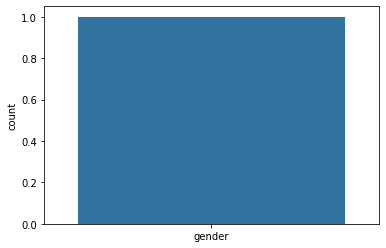

In [104]:
# How many of our artists are male, female, mixed? Create a count plot

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x = ['gender'], data = gender_counts_dropped)
plt.show()

### Giving location numerical values

In [105]:
audio_df['Code'] = pd.factorize(audio_df.location)[0]
audio_df.head()

,artist_id,artist_name,gender,members,style,genre,year_formed,year_disbanded,location,Code
0,128851,elbicho,Null,1,Null,Null,NaN,None,Null,0
1,135525,"Eddie ""Lockjaw"" Davis",Null,None,Null,Null,1922,None,Null,0
2,139700,Adam K,Null,None,Null,Null,NaN,None,Null,0
3,125013,Modà,Male,5,Rock/Pop,Pop-Rock,2002,None,Null,0
4,154354,L,Male,1,Null,Pop,2011,None,UK,1


In [106]:
audio_df.Code.value_counts()

0     207
2      60
1      24
18      9
17      7
     ... 
36      1
37      1
38      1
9       1
68      1
Name: Code, Length: 69, dtype: int64

### Genre by Location

In [191]:
#GROUPBYS WITH NULL VALUES DROPPED

#create new vartiables = one df with null values in 'genre' and 'location' dropped
genre_location_na = location_na.replace({'genre': r'Null'}, {'genre': np.nan}, regex=True)
genre_location_dropped = genre_location_na.dropna(axis=0, subset=['genre'], inplace=False)
genre_location_na.dropna(axis=0, subset=['location'], inplace=False)
genre_location_dropped

#groupby location
genre_location_grouped = genre_location_dropped.groupby('location')

#count location by genre
genre_by_location = genre_location_grouped['genre'].value_counts()

genre_by_location_sorted = genre_by_location.sort_values(ascending=False)

genre_by_location_sorted.head(10)

location  genre      
USA       Hip-Hop        6
UK        Pop            6
USA       Jazz           6
          Pop            6
          Rock           4
          Indie Rock     3
          Folk           3
          Indie          3
UK        Drum & Bass    2
USA       Soul           2
Name: genre, dtype: int64

In [199]:
#find genres in top 3 countries
genre_location_grouped = genre_location_dropped.groupby(['location', 'genre']).size()
genre_location_sorted = genre_location_grouped.sort_values(ascending=False)
genre_location_sorted.head()

location  genre  
USA       Hip-Hop    6
          Jazz       6
UK        Pop        6
USA       Pop        6
          Rock       4
dtype: int64

### Genre by Year

In [201]:
#GROUPBYS WITH NULL VALUES DROPPED

#create new vartiables = one df with null values in 'genre' and 'year_formed' dropped
genre_year_na = genre_na.replace({'year_formed': r'Null'}, {'year_formed': np.nan}, regex=True)
genre_year_dropped = genre_year_na.dropna(axis=0, subset=['year_formed'], inplace=False)
genre_year_dropped

#groupby year formed
genre_year_grouped = genre_year_dropped.groupby('year_formed')

#count genre on year formed groupby
genre_by_year = genre_year_grouped['genre'].value_counts()

genre_by_year

year_formed  genre           
1994         Pop                 2
1998         Country             2
2006         Metalcore           2
2003         Alternative Rock    1
2000         Pop                 1
                                ..
1988         Electronic          1
             Heavy Metal         1
             J-Pop               1
             Jazz                1
2015         Indie Pop           1
Name: genre, Length: 158, dtype: int64

### Genre (by Year)

In [211]:
#Genre by Year
#GROUPBYS WITH NULL VALUES DROPPED

#create new vartiables = one df with null values in 'genre' and 'year_formed' dropped
genre_year_dropped

#groupby year formed
year_genre_grouped = genre_year_dropped.groupby('genre')

#count genre on year formed groupby
year_by_genre = year_genre_grouped['year_formed'].value_counts()

year_by_genre.loc[['Pop', 'Country']]

genre    year_formed
Pop      1994           2
         1959           1
         1961           1
         1963           1
         1965           1
         1973           1
         1974           1
         1985           1
         1986           1
         1988           1
         1991           1
         2000           1
         2002           1
         2008           1
         2010           1
         2011           1
Country  1998           2
         1942           1
         1982           1
Name: year_formed, dtype: int64

### Year Formed

In [115]:
#Find the max year
max_year_formed = year_formed_dropped['year_formed'].max()
max_year_formed

'2017'

In [116]:
#Find the max year
min_year_formed = year_formed_dropped['year_formed'].min()
min_year_formed

'1548'

In [161]:
year_formed_series = year_formed_dropped['year_formed']
pd.to_numeric(year_formed_series)
year_formed_series

pd.to_datetime(year_formed_dropped['year_formed'], errors = 'coerce', utc = False, yearfirst=True)
year_formed_dropped['year_formed']

1      1922
3      2002
4      2011
5      1982
6      1978
       ... 
387    1986
389    1993
390    1988
393    2002
394    1992
Name: year_formed, Length: 239, dtype: object

In [158]:
#year_formed_dropped.astype({'year_formed':'int32'}).dtypes

#Create year bins to categorize year value into decades
year_bins = [1800, 1900, 2000, 2100]

#Create a new column called 'year_bins'
year_formed_dropped['year_bins'] = pd.cut(year_formed_dropped['year_formed'], bins=5, retbins=True)

#year_formed_dropped['year_formed'].value_counts(bins=5, sort=True)

#create a new variable with the count of each bin
#year_formed_groups = audio_df['year_bins'].value_count()


TypeError: can only concatenate str (not "float") to str

In [109]:
#find the max and min year
#year_bins = [0,9,19,29,39,49]
#year_groups = []

In [ ]:
# Artist and genre analysis
sty_analysis = {"Artist per Music Style": genre_counts_dropped}
music_analysis = pd.DataFrame(sty_analysis)
music_analysis

## Executive Summary

For this project we used data from the http://audiodb.com which uses a JSON API and contains information on over 53,000 artists.  In order to pull a managable amount of data, we created a list of randomly generated numbers within the range of available artist IDs.  This list was used to loop through the database URLs and pull information on all available artist IDs in the list.  From this information we created a new list with artist names corresponding to the aritst IDs. With the new list of artist IDs we were able to loop through database URLs to populate a dictionary with data, including: artist_id, artist_name, gender, members, style, genre, year_formed, year_disbanded, location.